# Exercício prático 

## Aula Síncrona 2 - Linguagem de Programação Aplicada
## 16/03/2024

---

## Parte 1 - Análise Exploratória dos Dados com Pandas

#### Importando bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Importando os dados


In [2]:
# read_csv
dados = pd.read_csv('wine_dataset.csv')

In [3]:
# visualizando os dados com head
dados.head(15)

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_de_enxofre,densidade,sulfatos,perc_alcoolico,tipo_vinho
0,7.6,1.58,0.00,2.1,137.0,5.0,9.0,3.50,0.40,tinto
1,8.2,1.33,0.00,1.7,81.0,3.0,12.0,3.53,0.49,tinto
2,8.1,1.33,0.00,1.8,82.0,3.0,12.0,3.54,0.48,tinto
3,9.8,1.24,0.34,2.0,79.0,32.0,151.0,3.15,0.53,tinto
4,8.0,1.18,0.21,1.9,83.0,14.0,41.0,3.34,0.47,tinto
5,5.7,1.13,0.09,1.5,172.0,7.0,19.0,3.50,0.48,tinto
6,8.2,1.00,0.09,2.3,65.0,7.0,37.0,3.32,0.55,tinto
7,8.2,1.00,0.09,2.3,65.0,7.0,37.0,3.32,0.55,tinto
8,7.2,1.00,0.00,3.0,102.0,7.0,16.0,3.43,0.46,tinto
9,9.8,0.98,0.32,2.3,78.0,35.0,152.0,3.25,0.48,tinto


In [4]:
# quantidade de linhas e colunas com shape
dados.shape

(6138, 10)

#### Análise Exploratória de Dados

In [5]:
# imprimir os tipos de cada coluna
dados.dtypes

acidez_fixa           float64
acidez_volatil        float64
acido_citrico         float64
acucar_residual       float64
cloretos              float64
dioxido_de_enxofre    float64
densidade             float64
sulfatos              float64
perc_alcoolico        float64
tipo_vinho             object
dtype: object

In [6]:
# resumo das variáveis, utilizando a função describe
dados.describe()

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_de_enxofre,densidade,sulfatos,perc_alcoolico
count,6138.000000,6138.000000,6138.000000,6138.000000,6138.000000,6138.000000,6138.000000,6138.000000,6138.000000
mean,7.214150,0.326779,0.324353,5.534718,48.814060,31.009123,117.680270,3.213641,0.529550
std,1.264585,0.148130,0.141189,4.740753,36.534073,17.658498,55.913171,0.158316,0.147864
min,3.800000,0.080000,0.000000,0.600000,0.020000,1.000000,6.000000,2.720000,0.220000
25%,6.400000,0.220000,0.250000,1.800000,34.000000,18.000000,82.000000,3.110000,0.430000
50%,7.000000,0.290000,0.310000,3.200000,45.000000,29.000000,120.000000,3.200000,0.500000
75%,7.700000,0.390000,0.400000,8.200000,58.000000,42.000000,157.000000,3.320000,0.600000
max,15.900000,1.580000,1.660000,31.600000,611.000000,289.000000,440.000000,4.010000,2.000000


In [7]:
# verificar valores faltantes com isna()
dados.isna().any()
dados.isna().sum()

acidez_fixa           0
acidez_volatil        0
acido_citrico         0
acucar_residual       0
cloretos              0
dioxido_de_enxofre    0
densidade             0
sulfatos              0
perc_alcoolico        0
tipo_vinho            0
dtype: int64

In [8]:
# verificar valores duplicados com duplicated()
dados.duplicated().sum() 

1146

In [9]:
# calcular valores por categoria tipo_vinho
valores_contados_1 = dados['tipo_vinho'].value_counts()
print(valores_contados_1)

tipo_vinho
branco    4740
tinto     1398
Name: count, dtype: int64


#### Visualização dos dados

Elaborar os gráficos e discutir os resultados



[Text(0, 0, '4740'), Text(0, 0, '1398')]

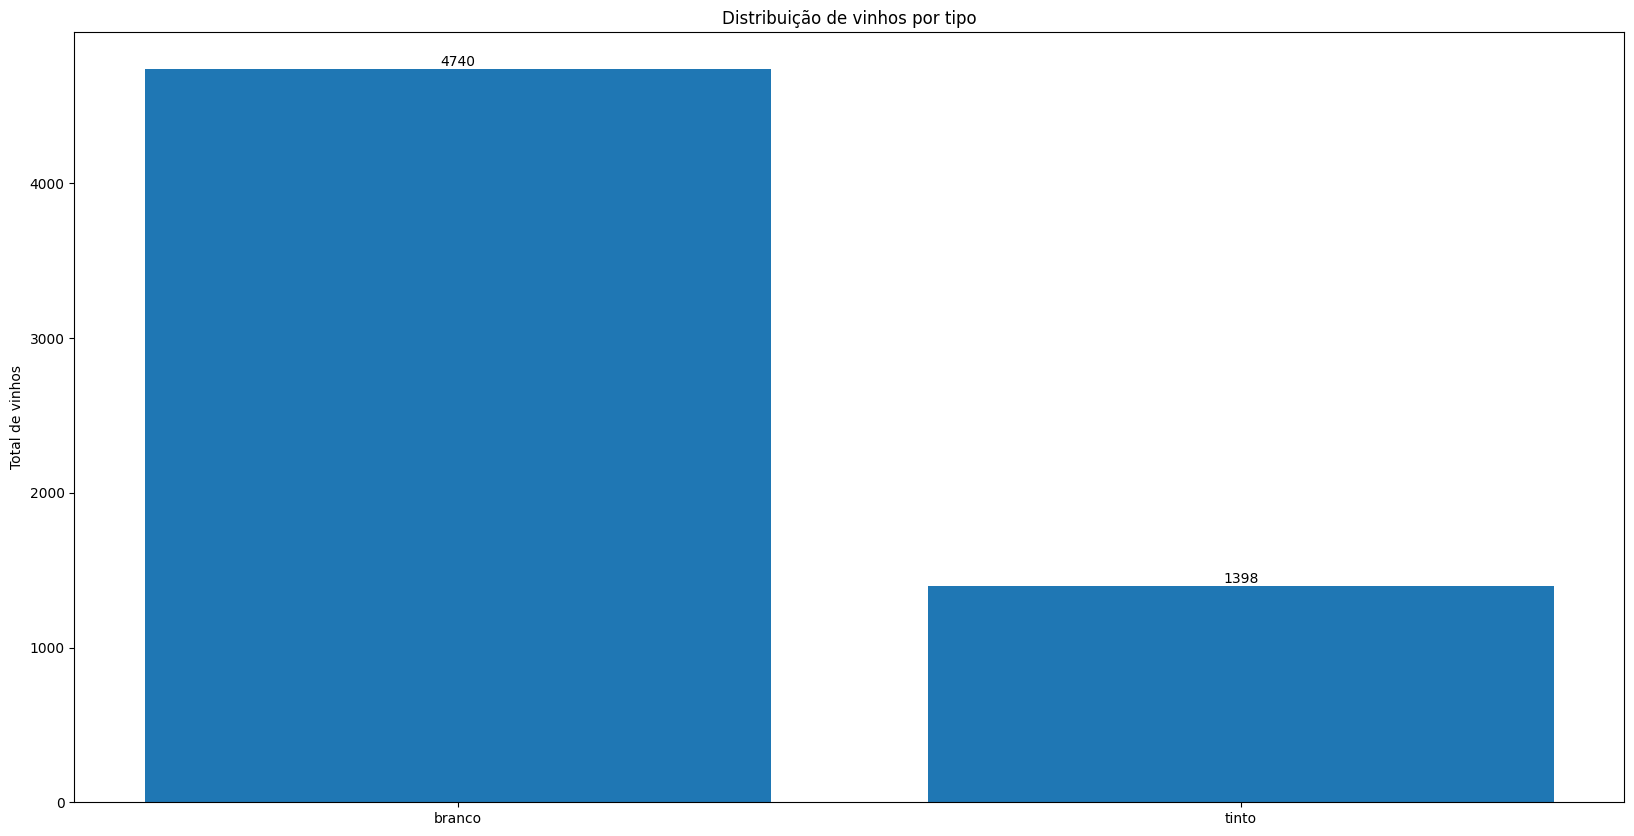

In [10]:
# gráfico da quantidade de vinhos por tipo (tinto ou branco)

plt.figure(figsize=(20,10)) # Aumentar o tamanho da figura na saída dos dados
grafico_1 = plt.bar(valores_contados_1.index, valores_contados_1.values) # plt.bar para gráfico de barras. Variáveis nos eixos X e Y
plt.title('Distribuição de vinhos por tipo') # plt.title para inserir título no gráfico
plt.ylabel('Total de vinhos'); # # plt.ylabel para inserir título no gráfico
plt.bar_label(grafico_1, size=10)

In [11]:
# gráfico da média de acidez fixa por tipo de vinho
media_acidez = dados.groupby(['tipo_vinho'])['acidez_fixa'].mean()
media_acidez = media_acidez.reset_index(name='Acidez Fixa')
print(media_acidez)

  tipo_vinho  Acidez Fixa
0     branco     6.875622
1      tinto     8.361946


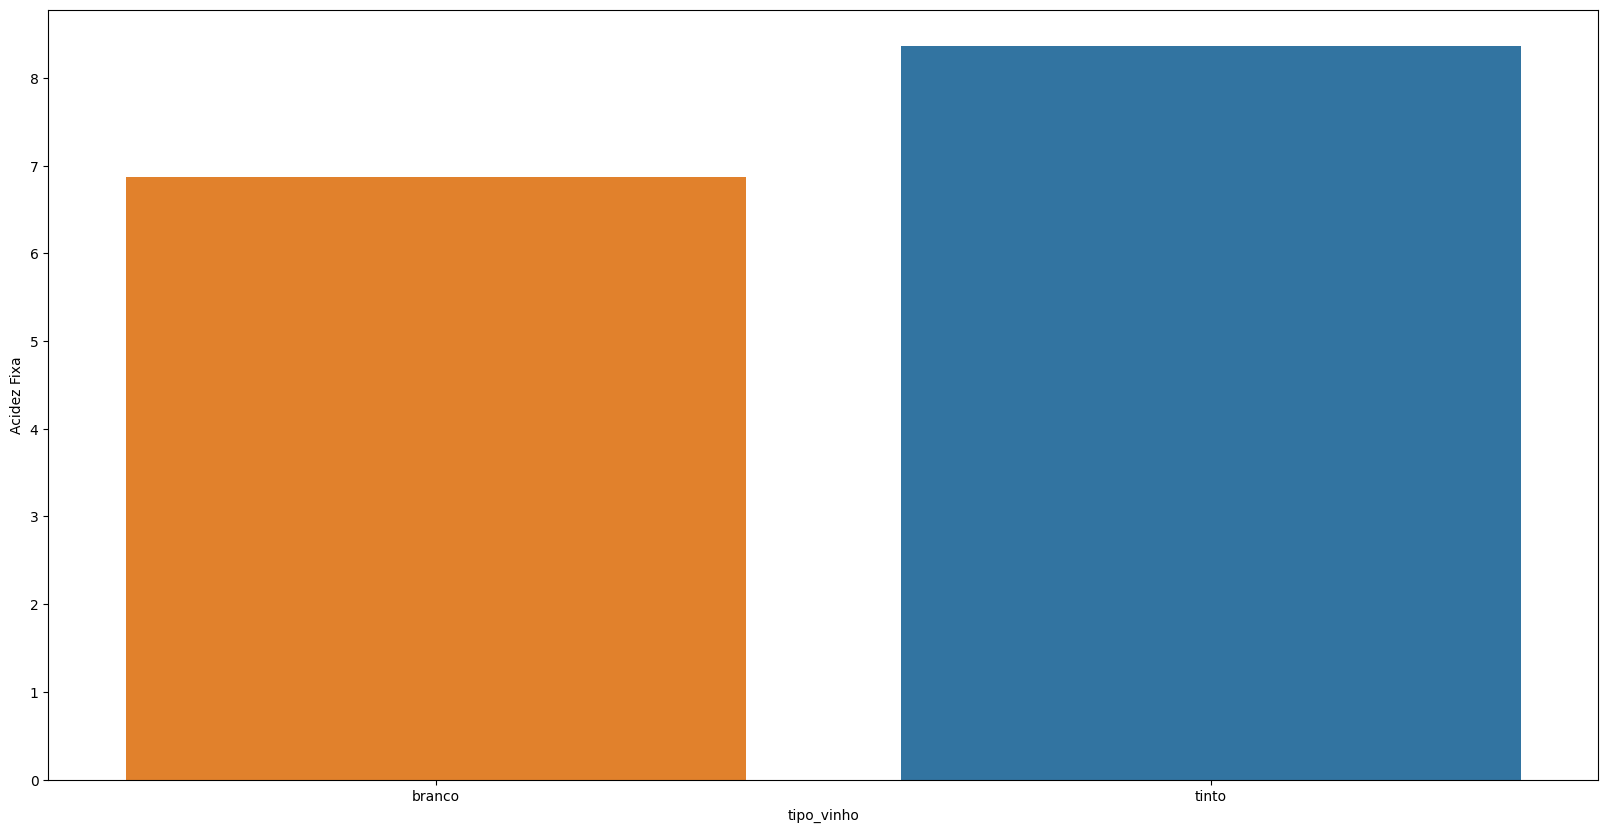

In [12]:
# gráfico da média de acidez fixa por tipo de vinho
plt.figure(figsize=(20,10))
sns.barplot(x='tipo_vinho', y='Acidez Fixa', hue='tipo_vinho', 
            data=media_acidez, hue_order=['tinto', 'branco']);

---
## Parte 2 - Algoritmo ExtraTrees para prever o tipo do vinho

#### Importando bibliotecas

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#### Preparação dos dados

In [24]:
# transformar coluna tipo_vinho em 0 e 1 (de categórica para numérica)
dados['tipo_vinho'] = LabelEncoder().fit_transform(dados['tipo_vinho']) 
dados.head()

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_de_enxofre,densidade,sulfatos,perc_alcoolico,tipo_vinho
0,7.6,1.58,0.00,2.1,137.0,5.0,9.0,3.50,0.40,1
1,8.2,1.33,0.00,1.7,81.0,3.0,12.0,3.53,0.49,1
2,8.1,1.33,0.00,1.8,82.0,3.0,12.0,3.54,0.48,1
3,9.8,1.24,0.34,2.0,79.0,32.0,151.0,3.15,0.53,1
4,8.0,1.18,0.21,1.9,83.0,14.0,41.0,3.34,0.47,1


In [25]:
# separar as variáveis Y (Target - tipo do vinho) do restante, que são as variáveis preditoras
y = dados['tipo_vinho']
x = dados.drop('tipo_vinho', axis = 1)

#### Divisão em treino e teste

In [26]:
# divisão dos dados em treino e teste: 30% pra treino e 70% para teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3)
print(dados.shape, x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)

(6138, 10) (4296, 9) (1842, 9) (4296,) (1842,)


#### Treinamento do modelo

#### Também pode ser resolvido com algoritmo de classificação, o ExtraTreesClassifier, já que o objetivo é CLASSIFICAR o tipo de vinho - se tinto ou branco

In [27]:
# modelo ExtraTreesClassifier
modelo = ExtraTreesClassifier()

In [28]:
# ajuste do modelo
modelo.fit(x_treino, y_treino)

ExtraTreesClassifier()

In [29]:
# cálculo da acurácia do modelo com o parametro score (para classificação)
resultado = modelo.score(x_teste, y_teste)

In [30]:
# imprimindo a acurácia do modelo
print(resultado)

0.996742671009772


In [35]:
# selecionando alguns valores para teste do modelo
print(y_teste[300:310])

4725    0
5744    0
1241    1
4037    0
759     1
1075    0
4945    0
4054    0
5944    0
591     0
Name: tipo_vinho, dtype: int64


In [36]:
previsoes = modelo.predict(x_teste[300:310])
print(previsoes)

[0 0 1 0 1 0 0 0 0 0]


---
#### Fim do código
#### Obrigada!  
#### Profa. Luani R O Piva - https://www.linkedin.com/in/luanipiva/